In [1]:
from Automata_lib import Automaton, OutputMode, from_digraph_to_dot, is_monotonic, to_digraph
import re, json
from graphviz import Digraph

In [2]:
a = Automaton("/root/src/bakalarka/Automata/Automata_lib/Examples/non_mon.txt")

In [4]:
a = Automaton("/root/src/bakalarka/Automata/Automata_lib/Examples/mono.txt")

In [40]:
a = Automaton("/root/src/bakalarka/Automata/Automata_lib/Examples/example0_without_MVL.txt")

``` python
def monotonic():
    all_rewrite_states
    all_states
    for state in all_states:
        if any(succesor in all_rewrite_states for succesor in succesors_of_rewite_after_k_MVR_steps()):
            return False
    for state in all_rewrite_states:
        for rewrite in rewrites[state]
            if any(word in is_accesible_from_initial_state(all_rewrite_states) for word in generate_word_from_prefix(rewite))
                return False
    return True
```

zkotrolovat 2 rewrites za sebou

In [3]:
def is_monotonic(a: Automaton):
    digrhaph, rewrites = to_digraph(a)
    # print(digrhaph)
    # print(rewrites)
    to_check= []
    for i in rewrites.keys():
        to_check.append(i)
    
    #check if nondeterministic could skipp rewrite and rewrite later
    reversed_digraph = defaultdict(list)
    for key in digrhaph.keys():
        for item in digrhaph[key]:
            reversed_digraph[item].append(key) 
            reversed_digraph[key] 

    used = {key: False for key in digrhaph.keys()}
    for state in to_check:
        st = [state]
        distance = {i:0 if i == state else -1 for i in reversed_digraph.keys()}
        while st:
            current = st.pop(0)
            if distance[current] >= a.size_of_window and current in rewrites.keys():
                return False
            for next_state in reversed_digraph[current]:
                if distance[current] == float("inf"):
                    if not distance[next_state] == float("inf"):
                        distance[next_state] = float("inf")
                    else:
                        continue # don't loop in infinity
                if distance[next_state] == -1:
                    distance[next_state] = distance[current] + 1
                else:
                    distance[next_state] = float("inf")
                st.append(next_state)

                
    # while to_compute:
    #     current = to_compute.pop(0)
    #     for state in reversed_digraph[current]:
    #         if distance[state] == -1:
    #             distance[state] = distance[current] + 1
    #             to_compute.append(state)

    # for state in digrhaph.keys():
    #     if state in rewrites.keys():
    #         difference = digrhaph[state] - rewrites[state]["to_state"]
    #         for state in difference:
    #             find_rewrite_after_n_steps(digrhaph, rewrites, diff, a.size_of_window)

    #checking if in next run there could be rewrite in k-1-(|word|-|new_word|)
    states_accesible_from_initial_without_rewrite = []
    to_check_without_states = [i[2:] for i in to_check]
    for i in to_check:
        for rewrite in rewrites[i]:
            rewrite = rewrite["rewriten_to"]
            # print(rewrite)
            for possible_bad_state in generate_pre_complete_word(a,rewrite): #k-1 
                if str(possible_bad_state) in to_check_without_states:
                    print(possible_bad_state, rewrite)
                    return False
    return True

In [5]:
from itertools import permutations
def generate_pre_complete_word(a:Automaton, content: list):
    ret = []
    final_lenth = a.size_of_window
    for i in range(1,len(content)):
        sufix = content[:i]
        symbols_needed = final_lenth - len(sufix) - 1
        perm = permutations(a.working_alphabet + a.alphabet, symbols_needed)
        for p in perm:
            for prefix in a.working_alphabet + a.alphabet + ["#"]:
                yield [prefix] + list(p) + sufix

In [8]:
is_monotonic(a)

['a', 'a', 'E'] ['E', 'E']


False

In [ ]:
for i in generate_pre_complete_word(a, ["a", "b"]):
    print(i)

In [9]:
#TODO should be done with generator to ensure space complexity
def generate_post_complete_word(a:Automaton, new_lenght:int, content: list):
    ret = []
    l = a.alphabet + a.working_alphabet +["$"]
    if new_lenght < len(content):
        return []
    if content and (content[-1] == "$" or new_lenght == len(content)):
        return [content]
    for i in l:
        new_word = content.copy()
        new_word += i
        ret.extend(generate_post_complete_word(a,new_lenght,new_word))
    return ret

    

In [7]:
from collections import defaultdict
def to_digraph(a: Automaton):
    possible_states = set(["Accept", "Restart"])
    for key in a.instructions.keys():
        for window in a.instructions[key]:
            possible_states.add(key + window) #beware of star
    # possible_states = {key + window for key in a.instructions.keys() for window in a.instructions[key]}
    # print(possible_states)
    possible_states = list(possible_states)
    digraph = defaultdict(list)
    rewrites = defaultdict(list)
    for state in possible_states:
        if "#" in state:
            digraph["Initial"].append(state)
    for key in a.instructions.keys():
        for window in a.instructions[key]:
            for instruction in a.instructions[key][window]:
                if type(instruction) is str:
                    digraph[key+window].append(instruction)
                elif type(instruction) is list and len(instruction) == 2:
                    to_state = instruction[0]
                    instruction = instruction[1]
                    if instruction == "MVR": 
                        for c in a.alphabet + a.working_alphabet + ["$"]:
                            new_window = str(eval(window)[1:] + [c])
                            if to_state+new_window in possible_states + [to_state+"['*']"]:
                                digraph[key+window].append(to_state+new_window)
                    elif instruction == "MVL":
                        # nahradit jednosmernym automatem
                        print("TODO MVL")
                    elif re.match(r"^\[.*\]$", instruction):
                        # rewrite_to = [a.strip() for a in instruction[1:-1].split(",")]
                        rewrite_to = eval(instruction)  # making array from string
                        # if to_state+"['*']" in possible_states:
                        #     tt = to_state+"['*']"
                        #     rewrites[key+window].append({"rewriten_to":rewrite_to,"to_state": tt})
                        #     digraph[key+window].append(tt)
                        if rewrite_to and rewrite_to[-1] == "$":
                            if to_state+"['$']" in possible_states: 
                                digraph[key+window].append(to_state+"['$']")
                                rewrites[key+window].append({"rewriten_to":rewrite_to,"to_state": to_state+"[]"})
                        else:
                            for possible_window in possible_states: #get rid all that couldnt be after ie those with #
                                if "#" not in possible_window and to_state == possible_window.split("[")[0]:
                                    digraph[key+window].append(possible_window)
                                    rewrites[key+window].append({"rewriten_to":rewrite_to, "to_state":possible_window})
    # dot.render('test-output/round-table.gv', view=True)
    dot = Digraph()
    for from_state in digraph.keys():
        for to_state in digraph[from_state]:
            dot.edge(from_state, to_state)
    # dot.render(f'test-output/{a.name}.gv', view=True)  # doctest: +SKIP
    return digraph,rewrites

In [14]:
digraph,rewrites = to_digraph(a)

dot = Digraph()
for from_state in digraph.keys():
    for to_state in digraph[from_state]:
        dot.edge(from_state, to_state)


In [ ]:
generate_post_complete_word(a,3,["b"])

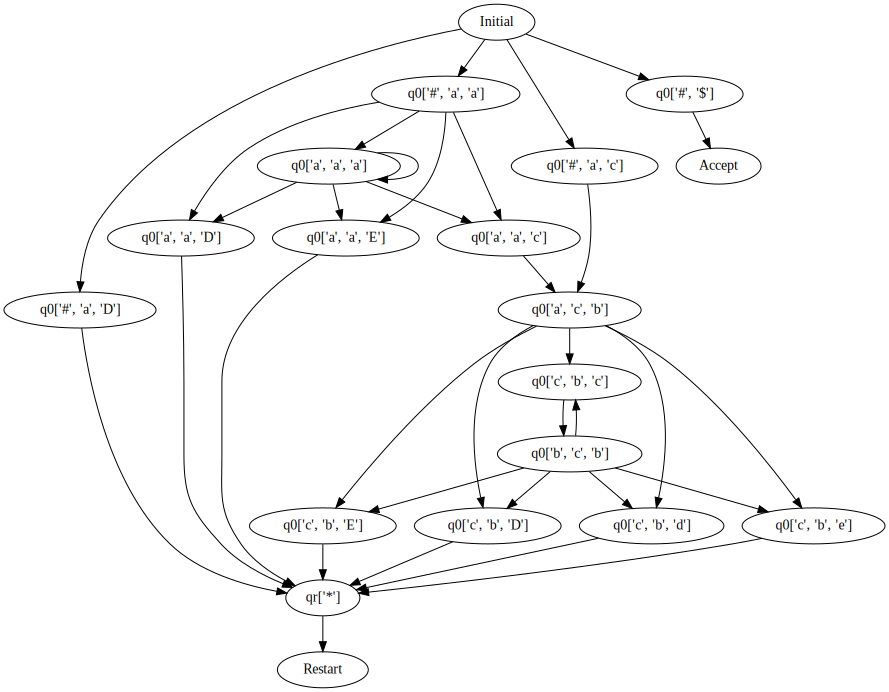

In [15]:
dot

In [19]:
to_digraph(a)

(defaultdict(list,
             {'Initial': ["q0['#', 'a', 'c']",
               "q0['#', '$']",
               "q0['#', 'a', 'a']",
               "q0['#', 'a', 'D']"],
              "q0['#', '$']": ['Accept'],
              "q0['a', 'a', 'a']": ["q0['a', 'a', 'a']",
               "q0['a', 'a', 'c']",
               "q0['a', 'a', 'E']",
               "q0['a', 'a', 'D']"],
              "q0['a', 'a', 'c']": ["q0['a', 'c', 'b']"],
              "q0['a', 'c', 'b']": ["q0['c', 'b', 'c']",
               "q0['c', 'b', 'd']",
               "q0['c', 'b', 'e']",
               "q0['c', 'b', 'E']",
               "q0['c', 'b', 'D']"],
              "q0['c', 'b', 'c']": ["q0['b', 'c', 'b']"],
              "q0['b', 'c', 'b']": ["q0['c', 'b', 'c']",
               "q0['c', 'b', 'd']",
               "q0['c', 'b', 'e']",
               "q0['c', 'b', 'E']",
               "q0['c', 'b', 'D']"],
              "q0['#', 'a', 'c']": ["q0['a', 'c', 'b']"],
              "q0['#', 'a', 'a']": ["q0['a',

In [17]:
a.instructions

{'q0': {"['a', 'a', 'a']": [['q0', 'MVR']],
  "['a', 'a', 'b']": [['q0', 'MVR']],
  "['a', 'b', 'b']": [['q0', 'MVR']],
  "['a', 'b', 'c']": [['q0', 'MVR']],
  "['b', 'b', 'b']": [['q0', 'MVR']],
  "['b', 'b', 'c']": [['q0', 'MVR'], ['qr', "['C', 'c']"]],
  "['#', 'c', '$']": ['Accept'],
  "['#', 'd', '$']": ['Accept'],
  "['#', 'a', 'b']": [['q0', 'MVR']],
  "['#', 'a', 'a']": [['q0', 'MVR']],
  "['b', 'b', 'd']": [['qr', "['D', 'd']"]],
  "['b', 'b', 'D']": [['qr', "['D', 'D']"]],
  "['b', 'b', 'C']": [['qr', "['C', 'C']"]],
  "['a', 'b', 'C']": [['qr', "['C']"]],
  "['a', 'a', 'C']": [['qr', '[]']],
  "['#', 'a', 'C']": [['qr', "['#']"]],
  "['a', 'a', 'D']": [['qr', "['a']"]],
  "['#', 'a', 'D']": [['qr', "['#']"]]},
 'qr': {"['*']": ['Restart']}}

In [ ]:
def can_restart_with_window(state, window):
    pass

In [55]:
def can_restart(state):
    s = [state]
    visited = [state]
    possible_states = []
    while s:
        cur_state = s.pop()
        for window in a.instructions[cur_state]:
            for right_side in a.instructions[cur_state][window]:
                if right_side == "Accept": continue
                if right_side == "Restart":
                    return True
                if right_side[0] not in visited:
                    possible_states.append(right_side[0])
                    visited.append(right_side[0])
                    s.append(right_side[0])
    return False

In [56]:
# a.instructions
can_restart("q0")

True

In [5]:
a.evaluate("#aabbc$")

['#', 'a', 'a', 'b', 'b', 'c', '$']


False

In [15]:
a.instructions

{'q0': {"['a', 'a', 'a']": [['q0', 'MVR']],
  "['a', 'a', 'b']": [['q0', 'MVR']],
  "['a', 'b', 'b']": [['q0', 'MVR']],
  "['a', 'b', 'c']": [['q0', 'MVR']],
  "['b', 'b', 'b']": [['q0', 'MVR']],
  "['b', 'b', 'c']": [['q0', 'MVR']],
  "['b', 'b', 'd']": [['q0', 'MVR']],
  "['#', 'c', '$']": ['Accept'],
  "['#', 'd', '$']": ['Accept'],
  "['#', 'a', 'b']": [['q0', 'MVR']],
  "['#', 'a', 'a']": [['q0', 'MVR']],
  "['b', 'c', '$']": [['qc', 'MVL']],
  "['b', 'd', '$']": [['qd', 'MVL']]},
 'qr': {"['*']": ['Restart']},
 'qc': {"['a', 'b', 'c']": [['qr', "['c']"]],
  "['b', 'b', 'c']": [['qc', 'MVL']],
  "['b', 'b', 'b']": [['qc', 'MVL']],
  "['a', 'b', 'b']": [['qr', "['b']"]]},
 'qd': {"['b', 'b', 'd']": [['qd', 'MVL']],
  "['b', 'b', 'b']": [['qd', 'MVL']],
  "['a', 'b', 'b']": [['qr', '[]']]}}

In [14]:
a.starting_position = 0
a.size_of_window = 3
a.initial_state = "q0"
a.add_to_alphabet("a", "b", "c", "d")

for i in ["aaa", "aab", "abb", "abc", "bbb", "bbc", "bbd"]:
    a.add_instr("q0", i, "q0", "MVR")

a.add_one_instr("q0", "#c$", "Accept")
a.add_one_instr("q0", "#d$", "Accept")

a.add_instr("q0", "#ab", "q0", "MVR")
a.add_instr("q0", "#aa", "q0", "MVR")
a.add_instr("q0", "bc$", "qc", "MVL")
a.add_instr("q0", "bd$", "qd", "MVL")

a.add_one_instr("qr", "*", "Restart")

a.add_instr("qc", "abc", "qr", "c")
a.add_instr("qc", "bbc", "qc", "MVL")
a.add_instr("qc", "bbb", "qc", "MVL")
a.add_instr("qc", "abb", "qr", "b")
a.add_instr("qd", "bbd", "qd", "MVL")
a.add_instr("qd", "bbb", "qd", "MVL")
a.add_instr("qd", "abb", "qr", "[]")

In [16]:
for i in a.instructions.keys():
    for w in a.instructions[i]:
        print(a.instructions[i][w])

[['q0', 'MVR']]
[['q0', 'MVR']]
[['q0', 'MVR']]
[['q0', 'MVR']]
[['q0', 'MVR']]
[['q0', 'MVR']]
[['q0', 'MVR']]
['Accept']
['Accept']
[['q0', 'MVR']]
[['q0', 'MVR']]
[['qc', 'MVL']]
[['qd', 'MVL']]
['Restart']
[['qr', "['c']"]]
[['qc', 'MVL']]
[['qc', 'MVL']]
[['qr', "['b']"]]
[['qd', 'MVL']]
[['qd', 'MVL']]
[['qr', '[]']]


In [17]:
a.evaluate("#aaabbbc$")

['#', 'a', 'a', 'a', 'b', 'b', 'b', 'c', '$']
remaining tuples = []
number of copies of text = 4
(#, a, a), a, b, b, b, c, $ | state: q0
#, (a, a, a), b, b, b, c, $ | state: q0
#, a, (a, a, b), b, b, c, $ | state: q0
#, a, a, (a, b, b), b, c, $ | state: q0
#, a, a, a, (b, b, b), c, $ | state: q0
#, a, a, a, b, (b, b, c), $ | state: q0
#, a, a, a, b, b, (b, c, $) | state: q0
#, a, a, a, b, (b, b, c), $ | state: qc
#, a, a, a, (b, b, b), c, $ | state: qc
#, a, a, (a, b, b), b, c, $ | state: qc
#, a, a, (b, b, c), $ | state: qr | ['a', 'b', 'b'] --> ['b']
(#, a, a), b, b, c, $ | state: q0
#, (a, a, b), b, c, $ | state: q0
#, a, (a, b, b), c, $ | state: q0
#, a, a, (b, b, c), $ | state: q0
#, a, a, b, (b, c, $) | state: q0
#, a, a, (b, b, c), $ | state: qc
#, a, (a, b, b), c, $ | state: qc
#, a, (b, c, $) | state: qr | ['a', 'b', 'b'] --> ['b']
(#, a, b), c, $ | state: q0
#, (a, b, c), $ | state: q0
#, a, (b, c, $) | state: q0
#, (a, b, c), $ | state: qc
#, (c, $) | state: qr | ['a', 'b', 

True

In [5]:
a.instructions

{'q0': {"['a', 'a', 'a']": [['q0', 'MVR']],
  "['a', 'a', 'b']": [['q0', 'MVR']],
  "['a', 'b', 'b']": [['q0', 'MVR']],
  "['a', 'b', 'c']": [['q0', 'MVR']],
  "['b', 'b', 'b']": [['q0', 'MVR']],
  "['b', 'b', 'c']": [['q0', 'MVR']],
  "['b', 'b', 'd']": [['q0', 'MVR']],
  "['#', 'c', '$']": ['Accept'],
  "['#', 'd', '$']": ['Accept'],
  "['#', 'a', 'b']": [['q0', 'MVR']],
  "['#', 'a', 'a']": [['q0', 'MVR']],
  "['b', 'c', '$']": [['qc', 'MVL']],
  "['b', 'd', '$']": [['qd', 'MVL']]},
 'qr': {"['*']": ['Restart']},
 'qc': {"['a', 'b', 'c']": [['qr', "['c']"]],
  "['b', 'b', 'c']": [['qc', 'MVL']],
  "['b', 'b', 'b']": [['qc', 'MVL']],
  "['a', 'b', 'b']": [['qr', "['b']"]]},
 'qd': {"['b', 'b', 'd']": [['qd', 'MVL']],
  "['b', 'b', 'b']": [['qd', 'MVL']],
  "['a', 'b', 'b']": [['qr', '[]']]}}

In [6]:
a = Automaton(file="../0n1n.txt")

In [11]:
a.evaluate("#000111$")

['#', '0', '0', '0', '1', '1', '1', '$']
remaining tuples = []
number of copies of text = 3
(#, 0, 0, 0), 1, 1, 1, $ | state: q0
#, (0, 0, 0, 1), 1, 1, $ | state: q0
#, 0, (0, 0, 1, 1), 1, $ | state: q0
#, 0, (0, 1, 1, $) | state: qr | ['0', '0', '1', '1'] --> ['0', '1']
(#, 0, 0, 1), 1, $ | state: q0
#, (0, 0, 1, 1), $ | state: q0
#, (0, 1, $) | state: qr | ['0', '0', '1', '1'] --> ['0', '1']
(#, 0, 1, $) | state: q0


True

In [10]:
a.logs

"['#', '0', '0', '0', '1', '1', '1', '$']\nremaining tuples = []\nnumber of copies of text = 3\n(#, 0, 0, 0), 1, 1, 1, $ | state: q0\n#, (0, 0, 0, 1), 1, 1, $ | state: q0\n#, 0, (0, 0, 1, 1), 1, $ | state: q0\n#, 0, (0, 1, 1, $) | state: qr | ['0', '0', '1', '1'] --> ['0', '1']\n(#, 0, 0, 1), 1, $ | state: q0\n#, (0, 0, 1, 1), $ | state: q0\n#, (0, 1, $) | state: qr | ['0', '0', '1', '1'] --> ['0', '1']\n(#, 0, 1, $) | state: q0\n['#', '0', '0', '0', '1', '1', '1', '$']\nremaining tuples = []\nnumber of copies of text = 3\n(#, 0, 0, 1), 1, $ | state: q0\n(#, 0, 1, $) | state: q0\n"